- **Nombre y Apellido:** Hernan Guido Gustavo Casasola

- **DNI: 29.976.458**
- **Carrera:** Tec. en desarrollo de software

- **Link Dataset:** https://www.kaggle.com/datasets/ankushpanday1/heart-attack-in-youth-vs-adult-in-americastate/data

# Librerias y complementos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials


from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1QzmHp3tIMIUgq74Xe3CfjdvEWNrtM9ui/view?usp=drive_link'

id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('heart_attack_youth_vs_adult.csv')


In [7]:
#Cargar archivo csv
df = pd.read_csv('heart_attack_youth_vs_adult.csv')

<IPython.core.display.Javascript object>

#Abstract

El objetivo de este análisis es identificar los factores más influyentes en el riesgo de ataque al corazón en jóvenes y adultos en Estados Unidos. Utilizando un conjunto de datos sintéticos con 5 millones de registros que incluyen información sobre salud, estilo de vida y demografía, el trabajo busca comparar cómo estos factores varían entre diferentes grupos de edad, género y etnia.

La metodología incluye la exploración de datos (EDA), análisis de correlaciones y visualización de patrones clave. Esto permitirá comprender las diferencias en los factores de riesgo según la edad, los hábitos de salud y las condiciones socioeconómicas y ambientales. Este enfoque no solo busca describir los patrones de riesgo, sino también proporcionar información útil para políticas de prevención y promoción de la salud pública.

Indicador de ataque al corazón. "1" si el individuo ha tenido un ataque al corazón, "0" si no (número entero).

##Objetivo
La interrogante principal de este análisis es:

> "¿Cuáles son los factores más influyentes en el riesgo de ataque al corazón en jóvenes y adultos en Estados Unidos, y cómo varían estos factores según edad, género, etnia y condiciones de vida?"

Para responder esta pregunta, se plantean los siguientes objetivos específicos:

- Identificar las características demográficas más asociadas al riesgo de ataque al corazón.

> ¿Qué grupo de edad (jóvenes vs. adultos) tiene mayor prevalencia?

> ¿Cuál es la influencia del género y la etnia?

- Evaluar la relación entre hábitos de salud y el riesgo de ataque al corazón.

> ¿Cómo influyen el consumo de alcohol y tabaco, la calidad de la dieta y la actividad física en el riesgo de ataque al corazón en jóvenes y adultos?

- Analizar el impacto del nivel socioeconómico y acceso a servicios de salud.

> ¿Qué relación existe entre el ingreso y el acceso a la atención médica con el riesgo de ataque al corazón?

- Explorar el papel de los factores ambientales y psicológicos.

> ¿Cómo afectan el estrés y el índice de calidad del aire en la prevalencia de ataques al corazón en diferentes grupos de edad?


Con estos análisis, se busca generar un entendimiento profundo que permita diseñar intervenciones personalizadas para reducir los riesgos y priorizar acciones de salud pública en poblaciones vulnerables.


##Información de atributos:

Información de Atributos

- ID: Identificador único de cada registro (entero).

- Age_Group: Grupo de edad del individuo. Puede ser "Youth" (joven) o "Adult" (adulto) (cadena de texto).

- Gender: Género del individuo. Los valores posibles son "Male" (masculino) o "Female" (femenino) (cadena de texto).

- Ethnicity: Etnicidad del individuo, por ejemplo, "Native American", "Black", "White", entre otros (cadena de texto).

- Smoking_Status: Estado de tabaquismo del individuo. Puede ser "Current Smoker", "Former Smoker" o "Non-smoker" (cadena de texto).

- Alcohol_Consumption: Nivel de consumo de alcohol. Los valores posibles son "Low", "Moderate", "High" (cadena de texto).

- Diet_Quality: Calidad de la dieta del individuo. Los valores son "Poor", "Average", "Good" (cadena de texto).

- Cholesterol_Level: Nivel de colesterol en sangre del individuo (número entero).

- Blood_Pressure: Nivel de presión arterial del individuo (número entero).

- BMI: Índice de masa corporal del individuo (número decimal).

- Physical_Activity: Nivel de actividad física del individuo, medido en una escala de 0 a 100 (entero).

- Stress_Level: Nivel de estrés del individuo. Los valores pueden ser "Low", "Moderate", "High" (cadena de texto).

- Family_History: Historia familiar de enfermedades cardíacas. "1" si tiene antecedentes familiares, "0" si no (número entero).

- Diabetes: Indicador de diabetes. "1" si tiene diabetes, "0" si no (número entero).

- Air_Quality_Index: Índice de calidad del aire, con valores como "Good", "Moderate", "Poor" (cadena de texto).

- Income_Level: Nivel de ingresos del individuo. Puede ser "Low", "Medium", "High" (cadena de texto).

- Sleep_Hours: Promedio de horas de sueño del individuo por noche (número decimal).

- Heart_Rate: Frecuencia cardíaca del individuo medida en latidos por minuto (entero).

- Medication_Status: Estado del uso de medicación, "1" si el individuo toma medicación regularmente, "0" si no (número entero).

- Heart_Attack: Indicador de ataque al corazón. "1" si el individuo ha tenido un ataque al corazón, "0" si no (número entero).



#Analisís de los datos

In [8]:
df.set_index('ID', inplace=True)


<IPython.core.display.Javascript object>

In [9]:
print(df)

<IPython.core.display.Javascript object>

        Age_Group  Gender        Ethnicity  Smoking_Status  \
ID                                                           
1           Youth  Female  Native American  Current Smoker   
2           Adult  Female  Native American      Non-smoker   
3           Adult    Male  Native American   Former Smoker   
4           Adult  Female            Black      Non-smoker   
5           Youth    Male            White      Non-smoker   
...           ...     ...              ...             ...   
4999996     Adult    Male            Asian   Former Smoker   
4999997     Youth    Male         Hispanic  Current Smoker   
4999998     Adult  Female            White   Former Smoker   
4999999     Adult    Male            White      Non-smoker   
5000000     Youth    Male         Hispanic      Non-smoker   

        Alcohol_Consumption Diet_Quality  Cholesterol_Level  Blood_Pressure  \
ID                                                                            
1                  Moderate      Av

In [10]:
columnas = df.columns
print("Columnas que integran el dataset: ")
print(columnas)
print(" ")
print(f"Total de filas en el dataSet: {len(df)}")

<IPython.core.display.Javascript object>

Columnas que integran el dataset: 
Index(['Age_Group', 'Gender', 'Ethnicity', 'Smoking_Status',
       'Alcohol_Consumption', 'Diet_Quality', 'Cholesterol_Level',
       'Blood_Pressure', 'BMI', 'Physical_Activity', 'Stress_Level',
       'Family_History', 'Diabetes', 'Air_Quality_Index', 'Income_Level',
       'Sleep_Hours', 'Heart_Rate', 'Medication_Status', 'Heart_Attack'],
      dtype='object')
 
Total de filas en el dataSet: 5000000


In [11]:
# Mostrar información del dataset
print("Información general del dataset:")
print(df.info())

<IPython.core.display.Javascript object>

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 5000000 entries, 1 to 5000000
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Age_Group            object 
 1   Gender               object 
 2   Ethnicity            object 
 3   Smoking_Status       object 
 4   Alcohol_Consumption  object 
 5   Diet_Quality         object 
 6   Cholesterol_Level    int64  
 7   Blood_Pressure       int64  
 8   BMI                  float64
 9   Physical_Activity    int64  
 10  Stress_Level         object 
 11  Family_History       int64  
 12  Diabetes             int64  
 13  Air_Quality_Index    object 
 14  Income_Level         object 
 15  Sleep_Hours          float64
 16  Heart_Rate           int64  
 17  Medication_Status    int64  
 18  Heart_Attack         int64  
dtypes: float64(2), int64(8), object(9)
memory usage: 762.9+ MB
None


In [12]:
# Vista de los primeros registros
print("Primeras filas del dataset:")
print(df.head())

<IPython.core.display.Javascript object>

Primeras filas del dataset:
   Age_Group  Gender        Ethnicity  Smoking_Status Alcohol_Consumption  \
ID                                                                          
1      Youth  Female  Native American  Current Smoker            Moderate   
2      Adult  Female  Native American      Non-smoker            Moderate   
3      Adult    Male  Native American   Former Smoker            Moderate   
4      Adult  Female            Black      Non-smoker            Moderate   
5      Youth    Male            White      Non-smoker            Moderate   

   Diet_Quality  Cholesterol_Level  Blood_Pressure   BMI  Physical_Activity  \
ID                                                                            
1       Average                219             130  24.0                149   
2       Average                151             122  35.6                199   
3       Average                141             155  22.3                 98   
4       Average                220   

### Limpieza y Formato

In [13]:
# Revisar valores nulos
print("Valores nulos en el dataset:")
print(df.isnull().sum())

<IPython.core.display.Javascript object>

Valores nulos en el dataset:
Age_Group                    0
Gender                       0
Ethnicity                    0
Smoking_Status               0
Alcohol_Consumption    1998915
Diet_Quality                 0
Cholesterol_Level            0
Blood_Pressure               0
BMI                          0
Physical_Activity            0
Stress_Level                 0
Family_History               0
Diabetes                     0
Air_Quality_Index            0
Income_Level                 0
Sleep_Hours                  0
Heart_Rate                   0
Medication_Status            0
Heart_Attack                 0
dtype: int64


In [14]:
# Eliminar nulos, vamos perder aproximadamente el 40% de los datos, pero NO puedo asumir que los que tiene datos nulos son no bebedores seria un sesgo,
# por lo cual preferimos perder los datos, en este caso
df = df.dropna(subset=['Alcohol_Consumption'])

<IPython.core.display.Javascript object>

In [15]:
# Revisar duplicados
print(f"Total de filas duplicadas: {df.duplicated().sum()}")


<IPython.core.display.Javascript object>

Total de filas duplicadas: 0


In [16]:
# Luego de la limpieza
print("Dataset después de limpieza:")
print(df.info())

<IPython.core.display.Javascript object>

Dataset después de limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 3001085 entries, 1 to 5000000
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Age_Group            object 
 1   Gender               object 
 2   Ethnicity            object 
 3   Smoking_Status       object 
 4   Alcohol_Consumption  object 
 5   Diet_Quality         object 
 6   Cholesterol_Level    int64  
 7   Blood_Pressure       int64  
 8   BMI                  float64
 9   Physical_Activity    int64  
 10  Stress_Level         object 
 11  Family_History       int64  
 12  Diabetes             int64  
 13  Air_Quality_Index    object 
 14  Income_Level         object 
 15  Sleep_Hours          float64
 16  Heart_Rate           int64  
 17  Medication_Status    int64  
 18  Heart_Attack         int64  
dtypes: float64(2), int64(8), object(9)
memory usage: 457.9+ MB
None


In [17]:
print("Distribución de las variables categóricas:")
print("------------------------------------------")
print(df['Age_Group'].value_counts())
print("------------------------------------------")
print(df['Gender'].value_counts())
print("------------------------------------------")
print(df['Smoking_Status'].value_counts())


<IPython.core.display.Javascript object>

Distribución de las variables categóricas:
------------------------------------------
Age_Group
Adult    1800878
Youth    1200207
Name: count, dtype: int64
------------------------------------------
Gender
Female    1442069
Male      1438900
Other      120116
Name: count, dtype: int64
------------------------------------------
Smoking_Status
Non-smoker        1801308
Former Smoker      749075
Current Smoker     450702
Name: count, dtype: int64


In [18]:
# Verificar valores inconsistentes - ejemplo "Unknown" o "NaN"
unique_values = {
    'Age_Group': df['Age_Group'].unique(),
    'Gender': df['Gender'].unique(),
    'Ethnicity': df['Ethnicity'].unique(),
    'Smoking_Status': df['Smoking_Status'].unique(),
    'Alcohol_Consumption': df['Alcohol_Consumption'].unique(),
    'Diet_Quality': df['Diet_Quality'].unique(),
    'Stress_Level': df['Stress_Level'].unique(),
    'Air_Quality_Index': df['Air_Quality_Index'].unique(),
    'Income_Level': df['Income_Level'].unique()
}

# Mostrar los valores únicos de manera más comprensible
for column, values in unique_values.items():
    print(f"Columna: {column}")
    print(f"Valores únicos: {values}\n")



<IPython.core.display.Javascript object>

Columna: Age_Group
Valores únicos: ['Youth' 'Adult']

Columna: Gender
Valores únicos: ['Female' 'Male' 'Other']

Columna: Ethnicity
Valores únicos: ['Native American' 'Black' 'White' 'Hispanic' 'Asian']

Columna: Smoking_Status
Valores únicos: ['Current Smoker' 'Non-smoker' 'Former Smoker']

Columna: Alcohol_Consumption
Valores únicos: ['Moderate' 'High']

Columna: Diet_Quality
Valores únicos: ['Average' 'Poor' 'Excellent']

Columna: Stress_Level
Valores únicos: ['High' 'Moderate' 'Low']

Columna: Air_Quality_Index
Valores únicos: ['Moderate' 'Good' 'Unhealthy']

Columna: Income_Level
Valores únicos: ['High' 'Medium' 'Low']



In [19]:
# Separar las columnas numéricas y categóricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_categorical = df.select_dtypes(include=['object'])

# Ver las columnas en cada conjunto
print("Columnas numéricas:\n", df_numeric.columns)
print("Columnas categóricas:\n", df_categorical.columns)


<IPython.core.display.Javascript object>

Columnas numéricas:
 Index(['Cholesterol_Level', 'Blood_Pressure', 'BMI', 'Physical_Activity',
       'Family_History', 'Diabetes', 'Sleep_Hours', 'Heart_Rate',
       'Medication_Status', 'Heart_Attack'],
      dtype='object')
Columnas categóricas:
 Index(['Age_Group', 'Gender', 'Ethnicity', 'Smoking_Status',
       'Alcohol_Consumption', 'Diet_Quality', 'Stress_Level',
       'Air_Quality_Index', 'Income_Level'],
      dtype='object')


1. Factores más influyentes en el riesgo de ataque al corazón

<IPython.core.display.Javascript object>

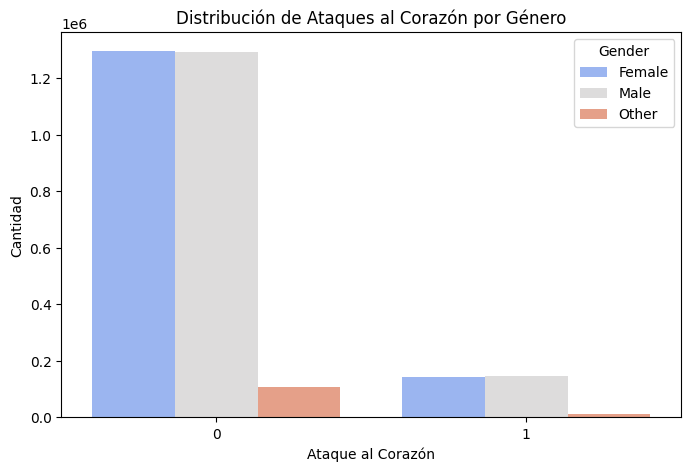

In [20]:
##Proporción de Ataques al Corazón por Género
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras: Ataques al corazón por Género
plt.figure(figsize=(8, 5))
sns.countplot(x='Heart_Attack', hue='Gender', data=df, palette="coolwarm")
plt.title('Distribución de Ataques al Corazón por Género')
plt.xlabel('Ataque al Corazón')
plt.ylabel('Cantidad')
plt.show()


In [21]:
# Contar la cantidad de ataques al corazón por género
attack_count_by_gender = df.groupby(['Heart_Attack', 'Gender']).size().unstack().T

# Mostrar la tabla
attack_count_by_gender


<IPython.core.display.Javascript object>

Heart_Attack,0,1
Gender,,
Female,1297936,144133
Male,1294563,144337
Other,108109,12007


<IPython.core.display.Javascript object>

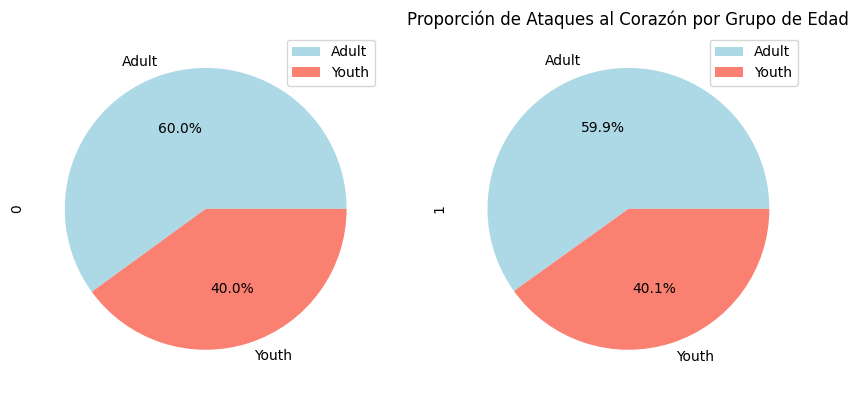

In [22]:
## Proporción de Ataques al Corazón por Grupo de Edad (Youth vs Adult)
df.groupby('Age_Group')['Heart_Attack'].value_counts().unstack().plot.pie(subplots=True, figsize=(10, 5), autopct='%1.1f%%', colors=["lightblue", "salmon"])
plt.title('Proporción de Ataques al Corazón por Grupo de Edad')
plt.show()


<IPython.core.display.Javascript object>

<ipython-input-23-b81a8e74cd06>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Heart_Attack', y='Cholesterol_Level', data=df, palette="coolwarm")


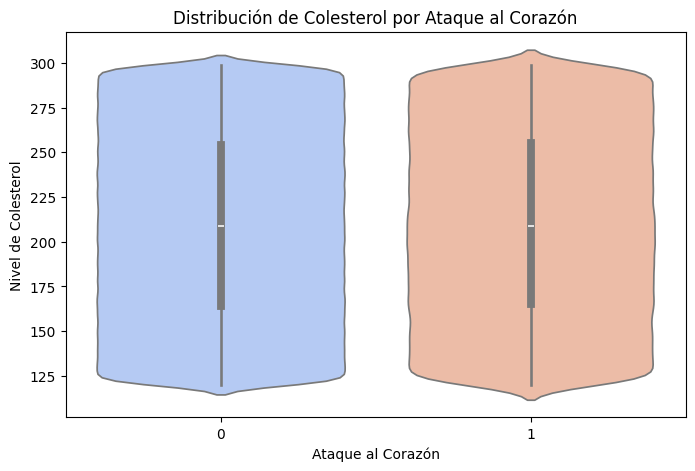

In [23]:
# Gráfico de violín: Distribución de Colesterol por Ataque al Corazón
plt.figure(figsize=(8, 5))
sns.violinplot(x='Heart_Attack', y='Cholesterol_Level', data=df, palette="coolwarm")
plt.title('Distribución de Colesterol por Ataque al Corazón')
plt.xlabel('Ataque al Corazón')
plt.ylabel('Nivel de Colesterol')
plt.show()


<IPython.core.display.Javascript object>

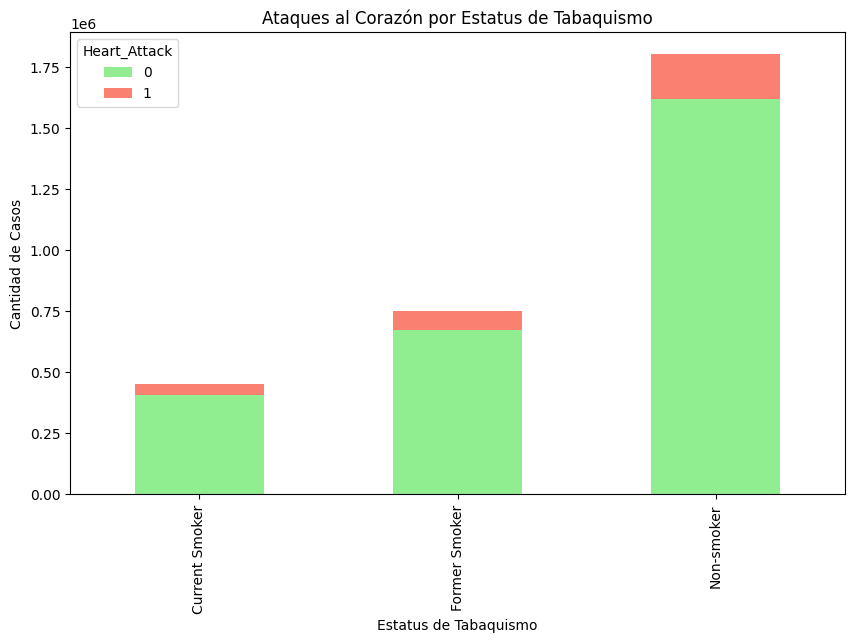

In [24]:
# Gráfico de barras apiladas: Ataques al Corazón por Estatus de Tabaquismo
pd.crosstab(df['Smoking_Status'], df['Heart_Attack']).plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightgreen', 'salmon'])
plt.title('Ataques al Corazón por Estatus de Tabaquismo')
plt.xlabel('Estatus de Tabaquismo')
plt.ylabel('Cantidad de Casos')
plt.show()


<IPython.core.display.Javascript object>

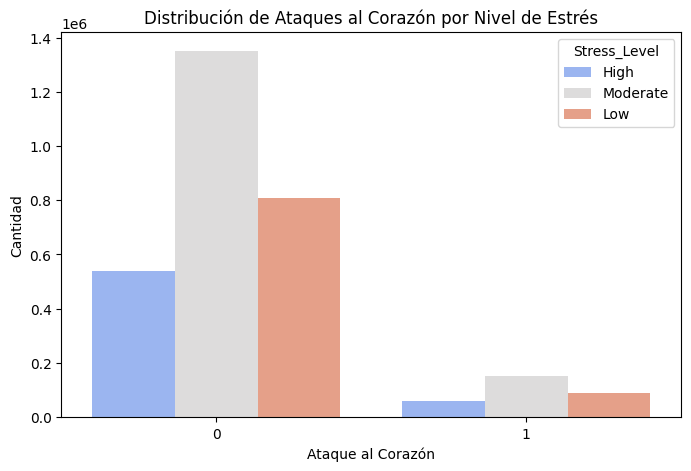

In [25]:
# Gráfico de barras: Ataques al Corazón por Nivel de Estrés
plt.figure(figsize=(8, 5))
sns.countplot(x='Heart_Attack', hue='Stress_Level', data=df, palette="coolwarm")
plt.title('Distribución de Ataques al Corazón por Nivel de Estrés')
plt.xlabel('Ataque al Corazón')
plt.ylabel('Cantidad')
plt.show()


<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


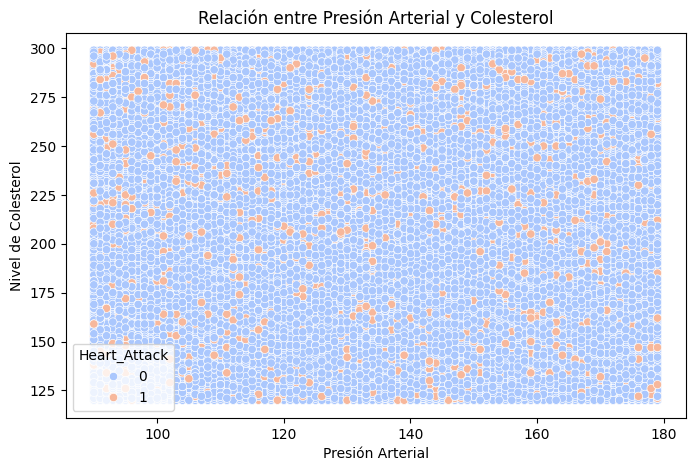

In [26]:
# Gráfico de dispersión: Presión Arterial vs Colesterol
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Blood_Pressure', y='Cholesterol_Level', hue='Heart_Attack', data=df, palette="coolwarm")
plt.title('Relación entre Presión Arterial y Colesterol')
plt.xlabel('Presión Arterial')
plt.ylabel('Nivel de Colesterol')
plt.show()


<IPython.core.display.Javascript object>

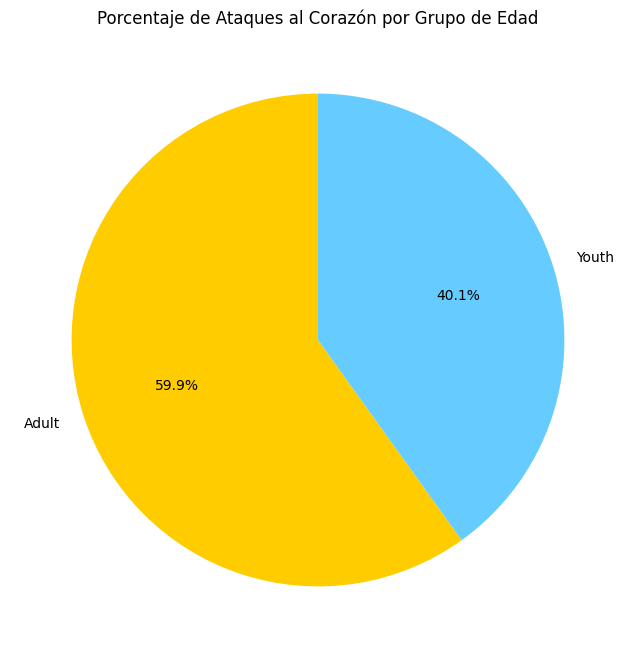

In [27]:
## ¿Quiénes sufren más ataques al corazón: jóvenes o adultos?"
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los registros donde hubo ataque al corazón
heart_attack_data = df[df['Heart_Attack'] == 1]

# Contar la cantidad de ataques por grupo de edad
age_group_counts = heart_attack_data['Age_Group'].value_counts()

# Calcular el porcentaje de cada grupo de edad
age_group_percentage = (age_group_counts / age_group_counts.sum()) * 100

# Crear gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(age_group_percentage, labels=age_group_percentage.index, autopct='%1.1f%%', startangle=90, colors=["#FFCC00", "#66CCFF"])
plt.title('Porcentaje de Ataques al Corazón por Grupo de Edad')
plt.show()



<IPython.core.display.Javascript object>

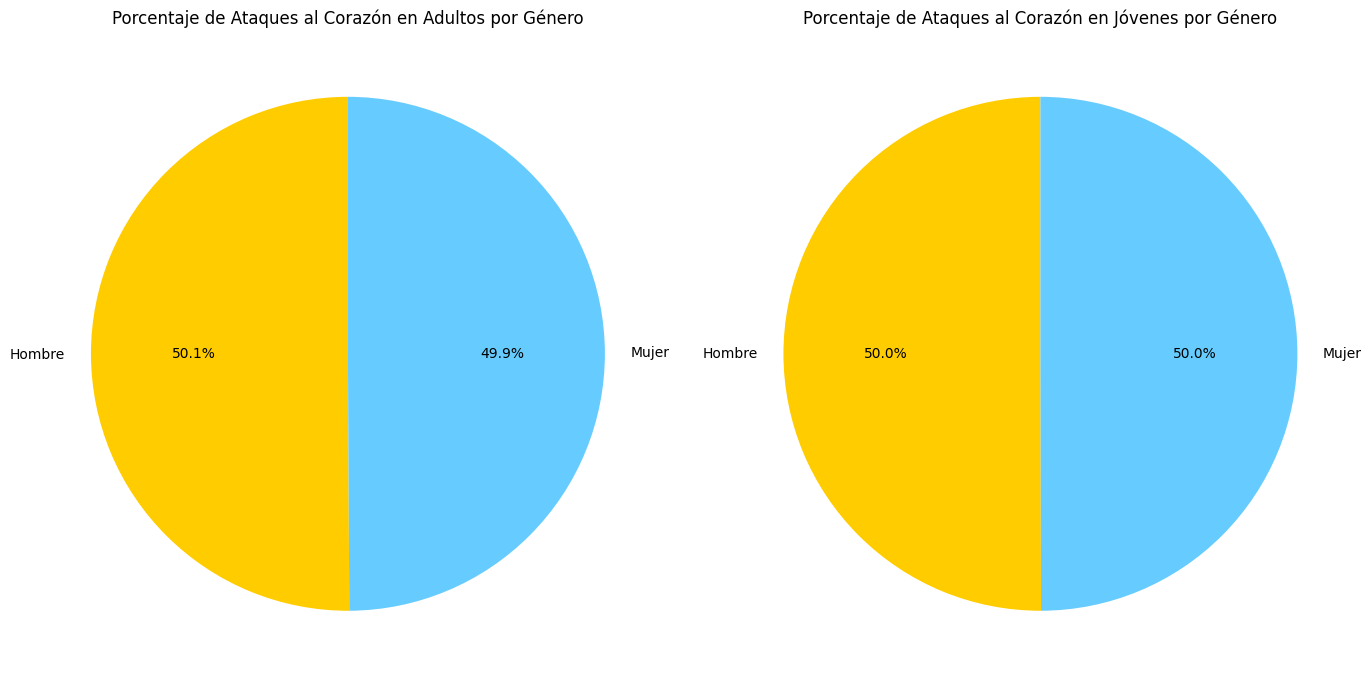

In [28]:
## ¿En hombres y mujeres adultos, quiénes son más propensos a sufrir ataques al corazón?"
import pandas as pd
import matplotlib.pyplot as plt

# Convertir 'Gender' a valores numéricos (0 = Male, 1 = Female)
df['Gender_Numeric'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Filtrar solo adultos que sufrieron ataque al corazón
adult_heart_attack = df[(df['Age_Group'] == 'Adult') & (df['Heart_Attack'] == 1)]

# Calcular porcentaje de hombres (0) y mujeres (1) entre los adultos que sufrieron un ataque al corazón
adult_gender_percentage = adult_heart_attack['Gender_Numeric'].value_counts(normalize=True) * 100

# Filtrar solo jóvenes que sufrieron ataque al corazón
youth_heart_attack = df[(df['Age_Group'] == 'Youth') & (df['Heart_Attack'] == 1)]

# Calcular porcentaje de hombres (0) y mujeres (1) entre los jóvenes que sufrieron un ataque al corazón
youth_gender_percentage = youth_heart_attack['Gender_Numeric'].value_counts(normalize=True) * 100

# Crear gráficos de torta para visualizar los porcentajes

plt.figure(figsize=(14, 7))

# Gráfico para adultos
plt.subplot(1, 2, 1)
plt.pie(adult_gender_percentage, labels=['Hombre', 'Mujer'], autopct='%1.1f%%', startangle=90, colors=["#FFCC00", "#66CCFF"])
plt.title('Porcentaje de Ataques al Corazón en Adultos por Género')

# Gráfico para jóvenes
plt.subplot(1, 2, 2)
plt.pie(youth_gender_percentage, labels=['Hombre', 'Mujer'], autopct='%1.1f%%', startangle=90, colors=["#FFCC00", "#66CCFF"])
plt.title('Porcentaje de Ataques al Corazón en Jóvenes por Género')

plt.tight_layout()
plt.show()




<IPython.core.display.Javascript object>

<ipython-input-29-fb7a2e571617>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=ethnicity_heart_attack.index, x=ethnicity_heart_attack.values, palette="magma")


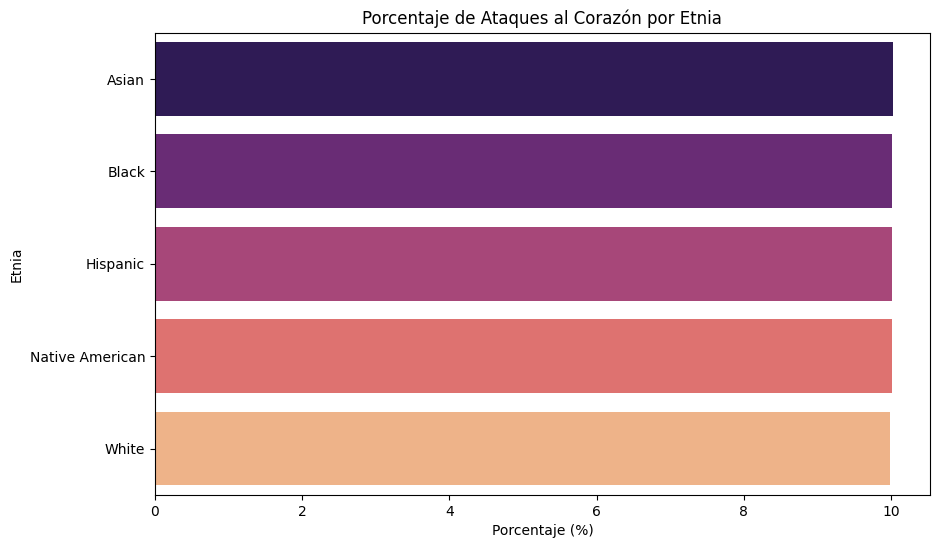

In [29]:
##¿Qué etnia tiene mayor prevalencia de ataques al corazón?
# Calcular porcentajes por etnia
ethnicity_heart_attack = df.groupby('Ethnicity')['Heart_Attack'].mean() * 100

# Crear gráfico
plt.figure(figsize=(10, 6))
sns.barplot(y=ethnicity_heart_attack.index, x=ethnicity_heart_attack.values, palette="magma")
plt.title('Porcentaje de Ataques al Corazón por Etnia')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Etnia')
plt.show()


In [ ]:
## Evaluar el impacto del alcohol y tabaco en adultos y jóvenes
# Comparar consumo de alcohol en jóvenes y adultos
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Filtrar datos de jóvenes y adultos
youth_data = df[df['Age_Group'] == 'Youth']

# Alcohol
sns.barplot(data=adult_data, x='Alcohol_Consumption', y='Heart_Attack', ax=axes[0], estimator=lambda x: 100 * x.mean(), palette="Blues")
sns.barplot(data=youth_data, x='Alcohol_Consumption', y='Heart_Attack', ax=axes[1], estimator=lambda x: 100 * x.mean(), palette="Greens")

axes[0].set_title('Ataques al Corazón en Adultos por Consumo de Alcohol')
axes[0].set_ylabel('Porcentaje (%)')
axes[0].set_xlabel('Consumo de Alcohol')

axes[1].set_title('Ataques al Corazón en Jóvenes por Consumo de Alcohol')
axes[1].set_ylabel('')
axes[1].set_xlabel('Consumo de Alcohol')

plt.tight_layout()
plt.show()


In [32]:
import pandas as pd

# Filtrar solo adultos y jóvenes que sufrieron ataque al corazón
adult_heart_attack = df[(df['Age_Group'] == 'Adult') & (df['Heart_Attack'] == 1)]
youth_heart_attack = df[(df['Age_Group'] == 'Youth') & (df['Heart_Attack'] == 1)]

# Contar hombres y mujeres en adultos
adult_counts = adult_heart_attack['Gender'].value_counts()
adult_percentages = adult_heart_attack['Gender'].value_counts(normalize=True) * 100

# Contar hombres y mujeres en jóvenes
youth_counts = youth_heart_attack['Gender'].value_counts()
youth_percentages = youth_heart_attack['Gender'].value_counts(normalize=True) * 100

# Crear una tabla con pandas
data = {
    'Grupo de Edad': ['Adultos', 'Adultos', 'Jóvenes', 'Jóvenes'],
    'Género': ['Hombre', 'Mujer', 'Hombre', 'Mujer'],
    'Cantidad': [adult_counts.get('Male', 0), adult_counts.get('Female', 0),
                 youth_counts.get('Male', 0), youth_counts.get('Female', 0)],
    'Porcentaje (%)': [adult_percentages.get('Male', 0), adult_percentages.get('Female', 0),
                       youth_percentages.get('Male', 0), youth_percentages.get('Female', 0)]
}

table = pd.DataFrame(data)

# Mostrar la tabla
print(table)


<IPython.core.display.Javascript object>

  Grupo de Edad  Género  Cantidad  Porcentaje (%)
0       Adultos  Hombre     86544       48.078664
1       Adultos   Mujer     86251       47.915891
2       Jóvenes  Hombre     57793       47.972143
3       Jóvenes   Mujer     57882       48.046019


In [33]:
# Listar las columnas para analizar
columns_to_check = ['Gender', 'Ethnicity', 'Smoking_Status', 'Alcohol_Consumption',
                    'Diet_Quality', 'Stress_Level', 'Air_Quality_Index', 'Income_Level', 'Age_Group']

# Mostrar valores únicos de cada columna
for column in columns_to_check:
    print(f"Valores únicos en la columna '{column}':")
    print(df[column].unique())
    print("-" * 50)


<IPython.core.display.Javascript object>

Valores únicos en la columna 'Gender':
['Female' 'Male' 'Other']
--------------------------------------------------
Valores únicos en la columna 'Ethnicity':
['Native American' 'Black' 'White' 'Hispanic' 'Asian']
--------------------------------------------------
Valores únicos en la columna 'Smoking_Status':
['Current Smoker' 'Non-smoker' 'Former Smoker']
--------------------------------------------------
Valores únicos en la columna 'Alcohol_Consumption':
['Moderate' 'High']
--------------------------------------------------
Valores únicos en la columna 'Diet_Quality':
['Average' 'Poor' 'Excellent']
--------------------------------------------------
Valores únicos en la columna 'Stress_Level':
['High' 'Moderate' 'Low']
--------------------------------------------------
Valores únicos en la columna 'Air_Quality_Index':
['Moderate' 'Good' 'Unhealthy']
--------------------------------------------------
Valores únicos en la columna 'Income_Level':
['High' 'Medium' 'Low']
----------------

<IPython.core.display.Javascript object>

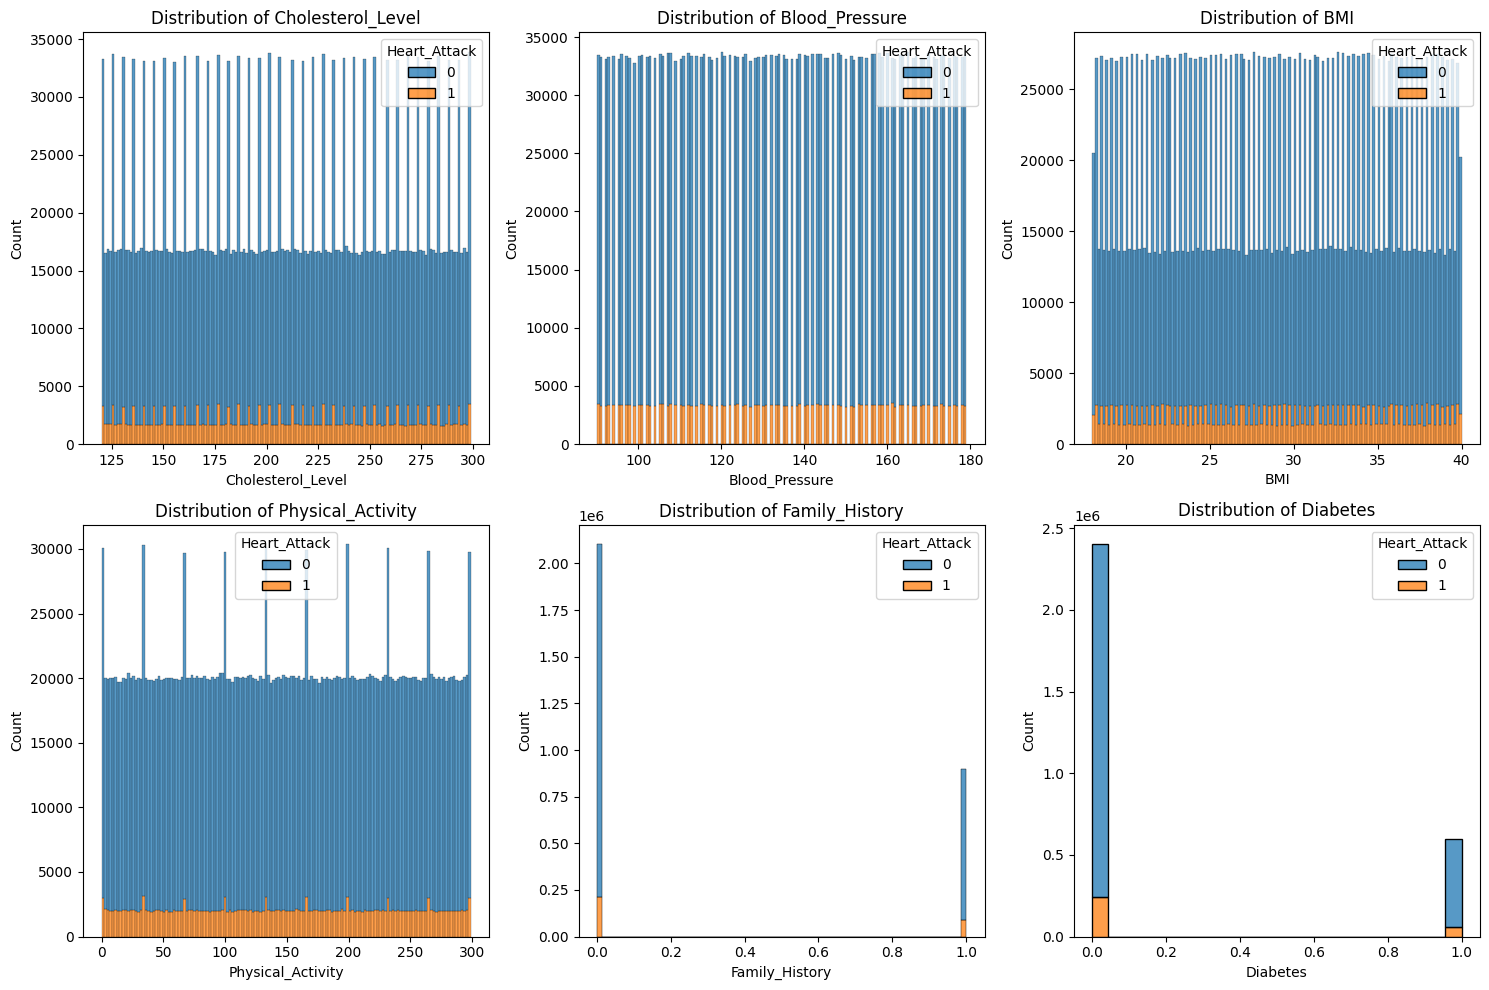

In [36]:
# Selección de las primeras 6 columnas numéricas para graficar
cols_to_plot = ['Cholesterol_Level', 'Blood_Pressure', 'BMI', 'Physical_Activity', 'Family_History', 'Diabetes']

# Crear subplots (2 filas, 3 columnas)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  #

# Graficar cada columna
for i, col in enumerate(cols_to_plot):
    sns.histplot(data=df, x=col, hue='Heart_Attack', multiple="stack", ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')  # Título para cada subplot

# Ajustar el diseño
plt.tight_layout()
plt.show()
